<a href="https://colab.research.google.com/github/zaephaer/MLU-02-BostonHousing-SimpleLinearRegression/blob/main/Boston_Housing_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import numpy as np
import pandas as pd
import sklearn

print("Numpy version :", np.__version__)
print("Pandas version :", pd.__version__)
import sys
print("System version :", sys.version)
print("Sklearn version :", sklearn.__version__)

Numpy version : 1.19.5
Pandas version : 1.1.5
System version : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Sklearn version : 0.22.2.post1


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [226]:
df = pd.read_csv("https://raw.githubusercontent.com/zaephaer/MLU-02-BostonHousing-SimpleLinearRegression/main/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


#Exploratory Data Analysis

In [227]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.594,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.597,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.647,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MDEV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Matplotlib Version : 3.2.2


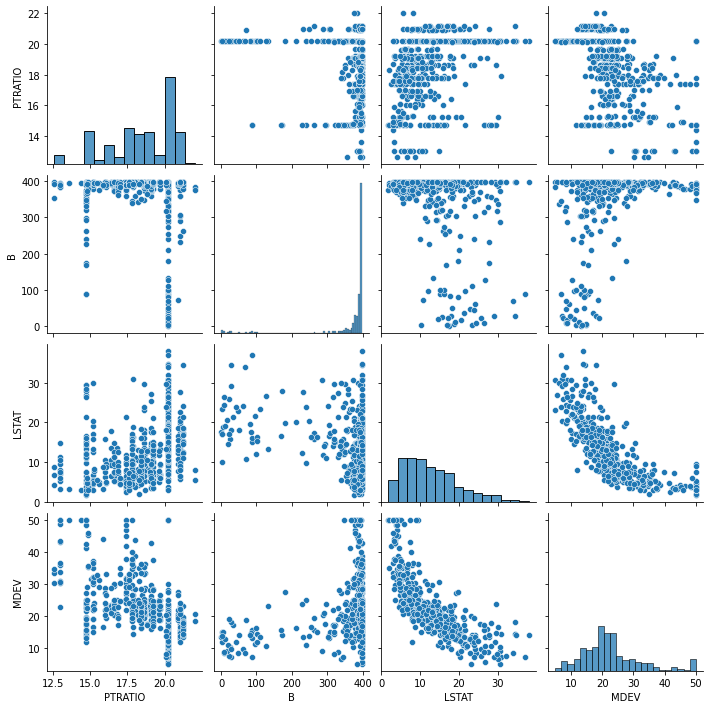

In [229]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
print("Matplotlib Version :", mpl. __version__)
import seaborn as sns

col_study = ['PTRATIO', 'B', 'LSTAT', 'MDEV']
sns.pairplot(df[col_study], height=2.5);
plt.show()

# Correlation Analysis and Feature Selection

Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1. A positive value for r indicates a positive association, and a negative value for r indicates a negative association

In [230]:
pd.options.display.float_format = '{:,.3f}'.format #Formatting float column of Dataframe in Pandas
df.corr() #generate correlation table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
ZN,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


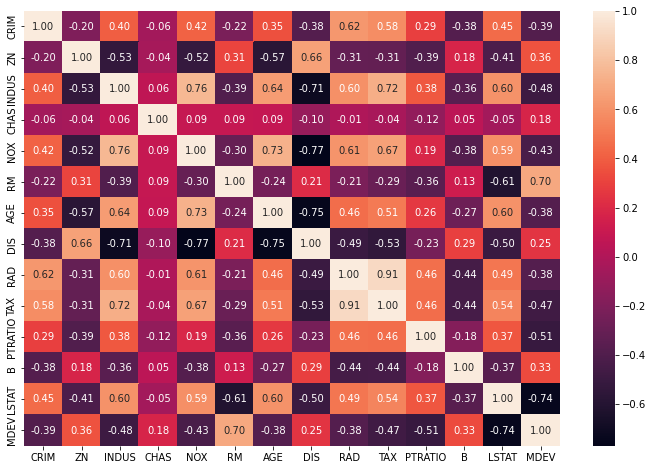

In [231]:
# correlation but using sns heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [232]:
# Ranking correlation for easier to see which feature with most high correlation to target MDEV
corr_rank = df.corr()
corr_rank["MDEV"].sort_values(ascending=False)

MDEV       1.000
RM         0.695
ZN         0.360
B          0.333
DIS        0.250
CHAS       0.175
AGE       -0.377
RAD       -0.382
CRIM      -0.386
NOX       -0.427
TAX       -0.469
INDUS     -0.484
PTRATIO   -0.508
LSTAT     -0.738
Name: MDEV, dtype: float64

In [233]:
import matplotlib as mpl 
print(mpl. __version__)

3.2.2


# Linear Regression Modelling using Scikit Learn (Model 1)

In [234]:
X = df['RM']
print(X.shape)
print(X.describe())

(506,)
count   506.000
mean      6.285
std       0.703
min       3.561
25%       5.886
50%       6.208
75%       6.623
max       8.780
Name: RM, dtype: float64


In [235]:
# Feature or independent variable
X = df['RM'].values.reshape(-1,1)
X.shape

(506, 1)

In [236]:
# Target or dependent variable
y = df['MDEV'].values
y.shape

(506,)

Model coefficient : [9.10210898]
Model intercept : -34.67062077643857


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


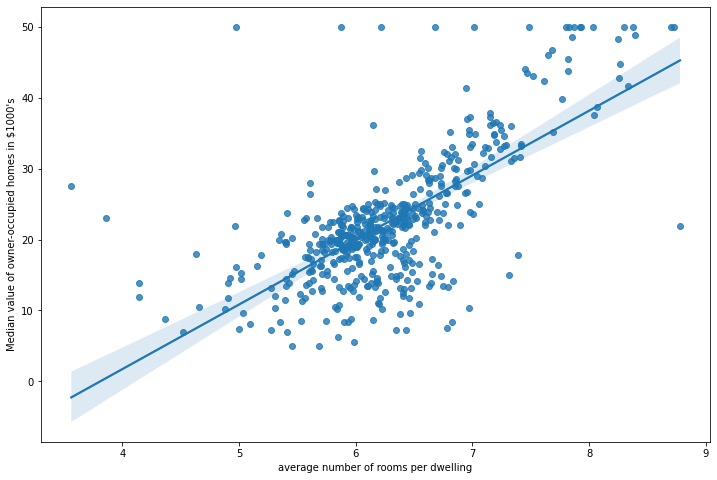

In [237]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

print("Model coefficient :", model.coef_)
print("Model intercept :", model.intercept_)

plt.figure(figsize=(12,8));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

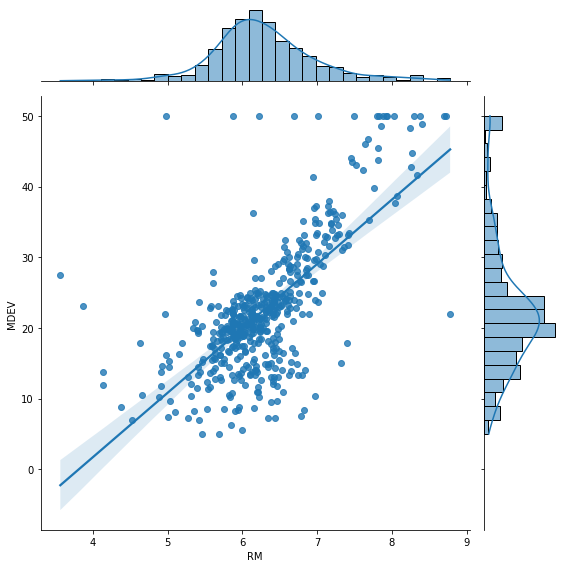

In [238]:
sns.jointplot(x='RM', y='MDEV', data=df, kind='reg', height=8);
plt.show();

# Making Prediction (Model 1)

In [239]:
# Test model with X value
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

In [240]:
# Test model using user input
RM_input = int(input("If the number of room is (between 3 to 9): "))
result = model.predict(np.array([RM_input]).reshape(1,-1))
print("The median house value will be :", result[0])

If the number of room is (between 3 to 9): 5
The median house value will be : 10.839924129462979


# Linear Regression Modelling using Scikit Learn (Model 2)

Model coefficient : [-0.95004935]
Model intercept : 34.5538408793831


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


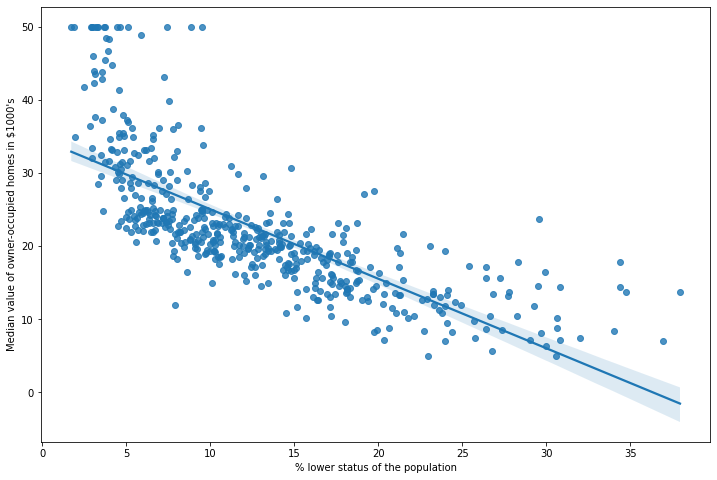

In [241]:
X2 = df['LSTAT'].values.reshape(-1,1)
y2 = df['MDEV'].values

model2 = LinearRegression()
model2.fit(X2, y2)

print("Model coefficient :", model2.coef_)
print("Model intercept :", model2.intercept_)

plt.figure(figsize=(12,8));
sns.regplot(X2, y2);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

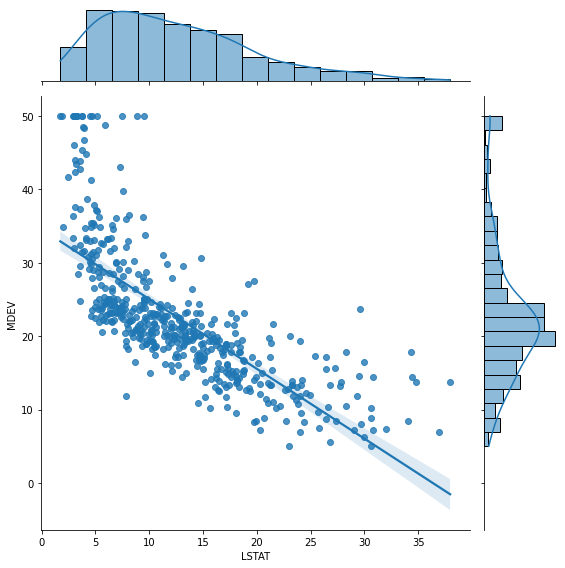

In [242]:
sns.jointplot(x='LSTAT', y='MDEV', data=df, kind='reg', height=8);
plt.show();

# Making Prediction (Model 2)

In [246]:
LSTAT_input = int(input("If the population lower status % (range from 1 to 38): "))
result = model2.predict(np.array([LSTAT_input]).reshape(1,-1))
print("The median house value will be :", result[0])

If the population lower status % (range from 1 to 38): 25
The median house value will be : 10.802607035433336
